In [25]:
import shutil, os, glob
import pickle as pkl

path = "/code/Unlearn-Bench/examples/results/CIFAR100/ResNet18/EmpiricalRiskMinimization/IDwiseUnlearnLoader_data_seed_2_train_seed_2/*.pkl"

pkl_files = glob.glob(path)

METHODS = [
    'Origin',
    'Retrain',
    'RandomLabel_epoch_10_lr_0.01_num_classes_100',
    'L1Sparse_epoch_10_lr_0.01_init_gamma_0.0005_schedule_ratio_-0.1',
    'BoundaryShrink_lr_1e-05_epoch_10',
    'BoundaryExpanding_lr_1e-05_epoch_10',
    'FineTune_epoch_5_lr_0.05',
    'GradientAscent_epoch_5_lr_0.005',
    'InfluenceUnlearn_alpha_10_n_samples_1000',
    'SCRUB_epoch_10_lr_0.0005_T_4_momentum_0.9_lr_decay_epochs_[3, 5, 9]_lr_decay_rate_0.1_m_steps_1_weight_decay_0.0005_beta_0.1'
]

METRICS = [
    'RunningTime', 
    'TestingAccuracy', 
    'RemainAccuracy',
    'UnlearnAccuracy', 
    'ForgettingAccuracy', 
    'MIAEfficacy', 
    'SimpleMIA', 
    'KSEval', 
    'WassDistance'
]

In [26]:
full_results = dict()
for method in METHODS:
    full_results[method] = dict()
    for metric in METRICS:
        full_results[method][metric] = []

for pkl_path in list(glob.glob(path)):
    with open(pkl_path, 'rb') as f:
        content = pkl.load(f)
    # print(content.keys())
    for metric in content:
        # metric_name = metric[0]
        metric_result = content[metric]
        for method_0 in metric_result.keys():
            method = method_0[0]
            # print(method, method_0)
            full_results[method][metric].append(metric_result[method_0])
    # break

In [27]:
content["RunningTime"]

{('Origin', 0): 0.0057909488677978516,
 ('Retrain', 0): 851.2007987499237,
 ('FineTune_epoch_5_lr_0.05', 0): 24.639638900756836,
 ('GradientAscent_epoch_5_lr_0.005', 0): 9.735346794128418,
 ('RandomLabel_epoch_10_lr_0.01_num_classes_100', 0): 47.84818363189697,
 ('InfluenceUnlearn_alpha_10_n_samples_1000', 0): 12.631568908691406,
 ('L1Sparse_epoch_10_lr_0.01_init_gamma_0.0005_schedule_ratio_-0.1',
  0): 54.20023441314697,
 ('BoundaryShrink_lr_1e-05_epoch_10', 0): 25.288827657699585,
 ('BoundaryExpanding_lr_1e-05_epoch_10', 0): 14.337083339691162,
 ('SCRUB_epoch_10_lr_0.0005_T_4_momentum_0.9_lr_decay_epochs_[3, 5, 9]_lr_decay_rate_0.1_m_steps_1_weight_decay_0.0005_beta_0.1',
  0): 76.54608798027039}

In [28]:
full_results.keys()

dict_keys(['Origin', 'Retrain', 'RandomLabel_epoch_10_lr_0.01_num_classes_100', 'L1Sparse_epoch_10_lr_0.01_init_gamma_0.0005_schedule_ratio_-0.1', 'BoundaryShrink_lr_1e-05_epoch_10', 'BoundaryExpanding_lr_1e-05_epoch_10', 'FineTune_epoch_5_lr_0.05', 'GradientAscent_epoch_5_lr_0.005', 'InfluenceUnlearn_alpha_10_n_samples_1000', 'SCRUB_epoch_10_lr_0.0005_T_4_momentum_0.9_lr_decay_epochs_[3, 5, 9]_lr_decay_rate_0.1_m_steps_1_weight_decay_0.0005_beta_0.1'])

In [29]:
import numpy as np

for method in full_results.keys():
    print(method)
    for metric in full_results[method]:
        # print(full_results[method][metric])
        if not isinstance(full_results[method][metric][0], (tuple, list)):
            print(method, metric, np.mean(full_results[method][metric]), np.std(full_results[method][metric]))
        else:
            print(method, metric, full_results[method][metric], len(full_results[method][metric][0]))
            for i in range(len(full_results[method][metric][0])):
                temp = []
                for j in full_results[method][metric]:
                    # print('j', j, i)
                    temp.append(j[i])
                print(method, metric, i, temp, np.mean(temp), np.std(temp))
            # for result in full_results[method][metric]:
            #     print(result)
            # for i in range(len(full_results[method][metric])):
            #     print(method, metric, np.mean(full_results[method][metric]), np.std(full_results[method][metric]))

Origin
Origin RunningTime 0.11578528881072998 0.3237786145159555
Origin TestingAccuracy 0.7187 0.0
Origin RemainAccuracy 0.9994844444444446 8.709296863228855e-05
Origin UnlearnAccuracy 0.9997200000000002 0.00022271057451320227
Origin ForgettingAccuracy 0.99954 0.0003231098884280766
Origin MIAEfficacy 0.021640000000000003 0.002484833998479579
Origin SimpleMIA [(0.7052999999999999, 0.7738328, 0.7246294048771712), (0.6931999999999999, 0.7649524, 0.7193037971100428), (0.7089, 0.7756628, 0.7310611227112276), (0.7147999999999999, 0.780892, 0.7333662122315486), (0.7103999999999999, 0.7762632, 0.7383915202826699), (0.7154, 0.7723252, 0.7198962614085269), (0.704, 0.7698619999999999, 0.7394834783045849), (0.6862, 0.7611559999999999, 0.7276149749171223), (0.6980999999999999, 0.7575792, 0.7267469390132322), (0.7005, 0.7725139999999999, 0.7205992123846511)] 3
Origin SimpleMIA 0 [0.7052999999999999, 0.6931999999999999, 0.7089, 0.7147999999999999, 0.7103999999999999, 0.7154, 0.704, 0.6862, 0.69809999

## Plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use('science')

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":11})     

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

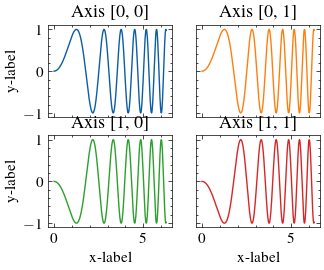

In [2]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()